In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

C:\Users\DELL-IN\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\DELL-IN\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\DELL-IN\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\DELL-IN\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "

In [2]:
data_mart=pd.read_csv('C:/Users/DELL-IN/Downloads/Video/AL/Big data mart/Train_Bigdatamart.csv')

In [3]:
data_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
data_mart.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
data_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [6]:
data_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
data_mart.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [8]:
data_mart.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [9]:
data_mart['Outlet_Size'].value_counts(normalize=True)

Medium    0.456895
Small     0.390643
High      0.152462
Name: Outlet_Size, dtype: float64

In [10]:
data_mart['Outlet_Size'] = data_mart['Outlet_Size'].fillna(pd.Series(np.random.choice(['Medium', 'Small'], 
                                                      p=[0.55, 0.45], size=len(data_mart))))

In [11]:
data_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
data_mart.Outlet_Size.value_counts()

Medium    4152
Small     3439
High       932
Name: Outlet_Size, dtype: int64

In [13]:
data_mart['Item_Weight']=data_mart['Item_Weight'].fillna(data_mart['Item_Weight'].mean())

In [14]:
data_mart.isnull().sum().any()

False

In [15]:
data_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
num_col=data_mart._get_numeric_data()
num_col.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052


In [17]:
data_mart.Outlet_Establishment_Year=pd.Categorical(data_mart.Outlet_Establishment_Year)

In [18]:
num_cols=data_mart._get_numeric_data()
num_cols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [19]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])


num_cols.apply(lambda x: var_summary(x)).T

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Item_Weight,8523.0,0.0,1.095857e+05,12.857645,12.857645,4.226124,1.786012e+01,4.555,5.175000,6.1300,7.004000,9.310000,12.857645,16.000000,19.100000,20.19000,20.850000,21.350000
Item_Visibility,8523.0,0.0,5.636433e+02,0.066132,0.053931,0.051598,2.662335e-03,0.000,0.000000,0.0000,0.012042,0.026989,0.053931,0.094585,0.139514,0.16378,0.226249,0.328391
Item_MRP,8523.0,0.0,1.201681e+06,140.992782,143.012800,62.275067,3.878184e+03,31.290,35.062752,42.5167,52.795600,93.826500,143.012800,185.643700,231.200480,250.76924,263.022600,266.888400
Item_Outlet_Sales,8523.0,0.0,1.859113e+07,2181.288914,1794.331000,1706.499616,2.912141e+06,33.290,83.890800,188.4214,343.552800,834.247400,1794.331000,3101.296400,4570.051200,5522.81100,7366.011720,13086.964800


In [20]:
num_cols['Item_Outlet_Sales']= num_cols['Item_Outlet_Sales'].clip_upper(num_cols['Item_Outlet_Sales'].quantile(0.99))

In [21]:
num_col.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011997
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.129897
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.571859
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.042991
Item_Outlet_Sales,0.011997,-0.129897,0.571859,-0.042991,1.000000


In [22]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(data_mart)

Number of variables,12
Number of observations,8523
Total Missing (%),0.0%
Total size in memory,741.2 KiB
Average record size in memory,89.1 B
Numeric,4
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,0


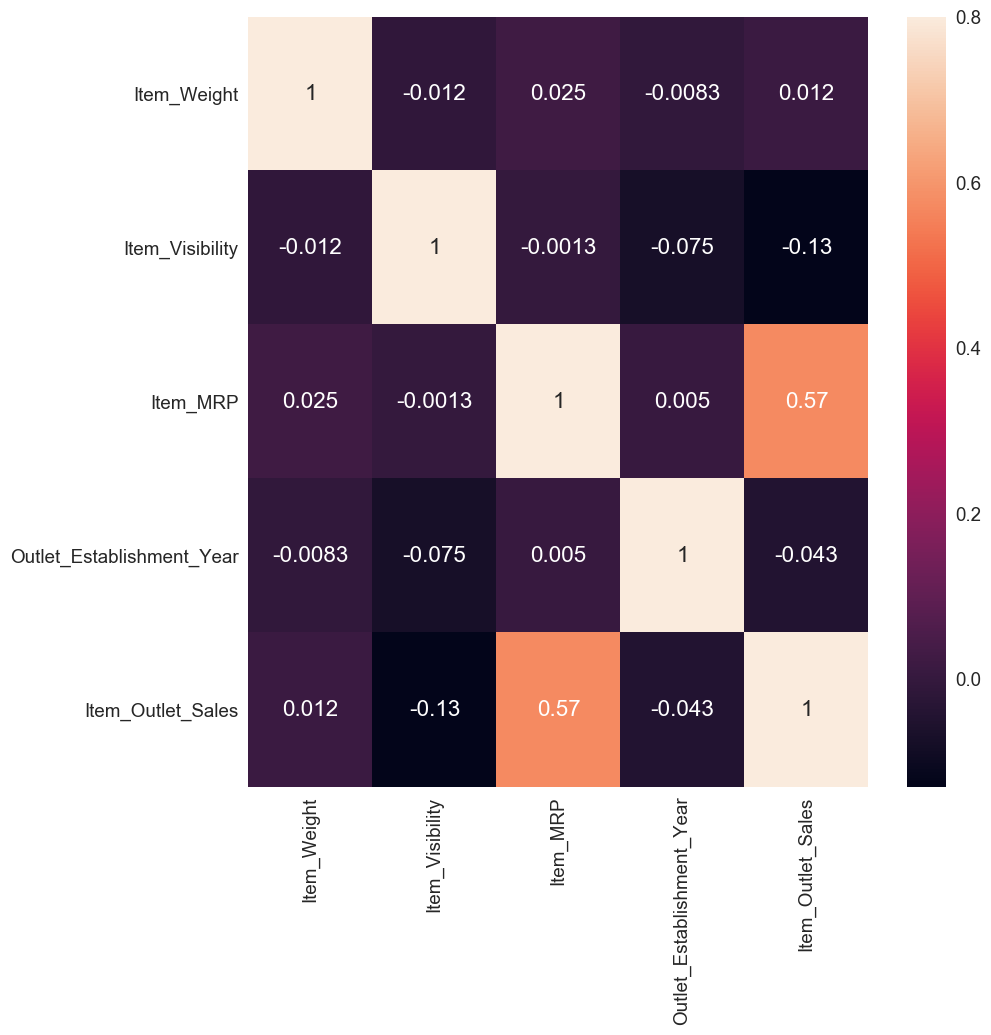

In [23]:
cm =num_col.corr()
sns.set(font_scale=1.35)
f, ax = plt.subplots(figsize=(10,10))
hm=sns.heatmap(cm, annot = True, vmax =.8)

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


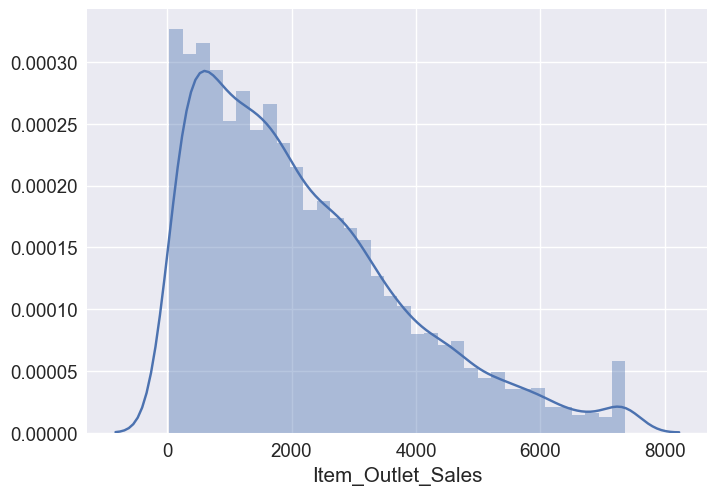

In [24]:
# Distribution of Y(price) variable) should be normal

sns.distplot(data_mart.Item_Outlet_Sales)

def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop(colname, axis=1, inplace=True)
    return df

In [25]:
cat_col=data_mart[['Item_Identifier','Item_Fat_Content', 'Item_Type','Outlet_Identifier', 'Outlet_Establishment_Year', 
         'Outlet_Size', 'Outlet_Location_Type','Outlet_Type']]

In [26]:
cat_col['Item_Identifier'] = cat_col.apply(lambda x: x['Item_Identifier'][:2], axis=1)

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [27]:
cat_col['Item_Identifier']=cat_col['Item_Identifier'].map({'FD':'Food', 'DR':'Drinks' , 'NC':'House'})

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
cat_col['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [29]:
cat_col['Item_Fat_Content']=cat_col['Item_Fat_Content'].map({'Low Fat':'Low Fat','Regular':'Regular','low fat':'Low Fat', 'LF': 'Low Fat', 'reg':'Regular'})

C:\Users\DELL-IN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
cat_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
Item_Identifier              8523 non-null object
Item_Fat_Content             8523 non-null object
Item_Type                    8523 non-null object
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null category
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
dtypes: category(1), object(7)
memory usage: 474.9+ KB


In [31]:
cat_col.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Food,Low Fat,Dairy,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,Drinks,Regular,Soft Drinks,OUT018,2009,Medium,Tier 3,Supermarket Type2
2,Food,Low Fat,Meat,OUT049,1999,Medium,Tier 1,Supermarket Type1
3,Food,Regular,Fruits and Vegetables,OUT010,1998,Small,Tier 3,Grocery Store
4,House,Low Fat,Household,OUT013,1987,High,Tier 3,Supermarket Type1


In [32]:
cat_cols =cat_col.drop(['Item_Type','Outlet_Identifier'], axis =1)

In [33]:
cat_cols.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

for c_feature in cat_cols:
    cat_cols[c_feature]=cat_cols[c_feature].astype('category')
    cat_cols=create_dummies(cat_cols,c_feature)

In [34]:
cat_cols.head()

,Item_Identifier,Item_Fat_Content,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Food,Low Fat,1999,Medium,Tier 1,Supermarket Type1
1,Drinks,Regular,2009,Medium,Tier 3,Supermarket Type2
2,Food,Low Fat,1999,Medium,Tier 1,Supermarket Type1
3,Food,Regular,1998,Small,Tier 3,Grocery Store
4,House,Low Fat,1987,High,Tier 3,Supermarket Type1


# categorical test using anova

Item_Fat_Content

In [35]:
categorical_col =pd.concat([cat_cols,num_cols.Item_Outlet_Sales],axis=1)
categorical_col.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [36]:
import scipy.stats as stats

In [37]:
cat_cols.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [38]:
s1 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Fat_Content=="Low Fat"]
s2 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Fat_Content=="Regular"]

In [39]:
stats.f_oneway(s1, s2)

F_onewayResult(statistic=3.1461195257247825, pvalue=0.07614346250723374)

Item_Identifier

In [40]:
cat_cols.Item_Identifier.value_counts()

Food      6125
House     1599
Drinks     799
Name: Item_Identifier, dtype: int64

In [41]:
s1 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Identifier=="Food"]
s2 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Identifier=="House"]
s3 = categorical_col.Item_Outlet_Sales[categorical_col.Item_Identifier=="Drinks"]

In [42]:
stats.f_oneway(s1, s2, s3)

F_onewayResult(statistic=6.344008332540123, pvalue=0.0017655566492522316)

Outlet_Establishment_Year

In [43]:
cat_cols.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
2004     930
1999     930
1997     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [44]:
s1 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Establishment_Year==1985]
s2 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Establishment_Year==1987]
s3 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Establishment_Year==2004]
s4 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Establishment_Year==1999]
s5 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Establishment_Year==1997]
s6 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Establishment_Year==2002]
s7 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Establishment_Year==2009]
s8 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Establishment_Year==2007]
s9 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Establishment_Year==1998]

In [45]:
stats.f_oneway(s1, s2, s3, s4,s5,s6,s7,s8,s9)

F_onewayResult(statistic=105.93146431484347, pvalue=3.581671949238666e-169)

Outlet_Size

In [46]:
cat_cols.Outlet_Size.value_counts()

Medium    4152
Small     3439
High       932
Name: Outlet_Size, dtype: int64

In [47]:
s1 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Size=="Medium"]
s2 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Size=="Small"]
s3 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Size=="High"]

In [48]:
stats.f_oneway(s1, s2, s3)

F_onewayResult(statistic=108.26331752440521, pvalue=3.709908515702937e-47)

Outlet_Location_Type

In [49]:
cat_cols.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [50]:
s1 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Location_Type=="Tier 3"]
s2 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Location_Type=="Tier 2"]
s3 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Location_Type=="Tier 1"]

In [51]:
stats.f_oneway(s1, s2, s3)

F_onewayResult(statistic=53.933205115481115, pvalue=5.298321057055861e-24)

Outlet_Type

In [52]:
cat_cols.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [53]:
s1 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Type=="Supermarket Type1"]
s2 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Type=="Grocery Store"]
s3 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Type=="Supermarket Type3"]
s4 = categorical_col.Item_Outlet_Sales[categorical_col.Outlet_Type=="Supermarket Type2"]

In [54]:
stats.f_oneway(s1, s2, s3, s4)

F_onewayResult(statistic=910.4459964416922, pvalue=0.0)

In [55]:
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop(colname, axis=1, inplace=True)
    return df

In [56]:
for c_feature in cat_cols:
    cat_cols[c_feature]=cat_cols[c_feature].astype('category')
    cat_cols=create_dummies(cat_cols,c_feature)

In [57]:
cat_cols.head()

,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_House,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,1,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,1,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,0,0,1,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [58]:
data_mart_cols=pd.concat([num_cols,cat_cols],axis=1)

In [59]:
data_mart_cols.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_House,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Establishment_Year_1985,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,3735.1380,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,443.4228,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,732.3800,0,1,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,0,1,1,0,0,...,1,0,0,0,0,1,0,1,0,0


In [60]:
data_mart_cols['sqrt_Item_Outlet_Sales']=np.sqrt(data_mart_cols['Item_Outlet_Sales'])

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


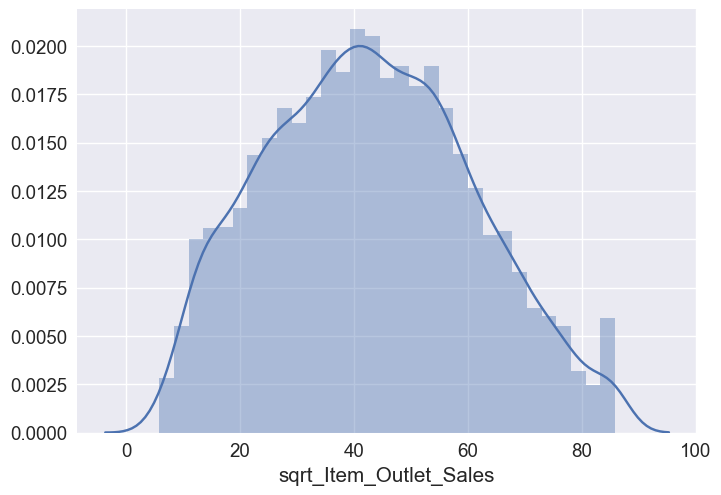

In [61]:
sns.distplot(data_mart_cols.sqrt_Item_Outlet_Sales)

In [62]:
data_mart_cols.drop('Item_Outlet_Sales',axis=1,inplace=True)

In [63]:
data_mart_cols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Identifier_Drinks',
       'Item_Identifier_Food', 'Item_Identifier_House',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
       'Outlet_Establishment_Year_2009', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'sqrt_Item_Outlet_Sales'],
      dtype='object')

In [64]:
data_mart_cols.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_Drinks,Item_Identifier_Food,Item_Identifier_House,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,...,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,sqrt_Item_Outlet_Sales
Item_Weight,1.000000e+00,-0.012049,0.024756,-0.050492,-0.007953,0.046858,0.021157,-0.021157,1.850090e-14,0.012313,...,-0.006001,-0.001719,0.003965,-0.014675,0.010447,0.002568,-0.002649,0.001299,1.413048e-14,0.011039
Item_Visibility,-1.204853e-02,1.000000,-0.001315,-0.018908,0.068133,-0.064358,-0.047314,0.047314,9.233432e-02,-0.041937,...,-0.048185,0.075769,0.061346,-0.068787,0.009650,0.286400,-0.144249,-0.034671,-5.114446e-02,-0.162037
Item_MRP,2.475610e-02,-0.001315,1.000000,-0.051733,0.029315,0.004859,-0.006063,0.006063,-8.745210e-03,0.002438,...,-0.005014,0.003558,-0.001229,0.001951,-0.000744,-0.004277,0.004885,0.003850,-6.713699e-03,0.563442
Item_Identifier_Drinks,-5.049245e-02,-0.018908,-0.051733,1.000000,-0.514021,-0.154560,0.177593,-0.177593,-1.403875e-02,-0.000479,...,-0.007437,0.007882,0.001016,0.007652,-0.008283,-0.003055,0.011999,-0.003872,-1.114516e-02,-0.035410
Item_Identifier_Food,-7.952640e-03,0.068133,0.029315,-0.514021,1.000000,-0.768023,-0.423092,0.423092,1.011966e-02,-0.003993,...,0.010541,-0.008199,0.001673,-0.000235,-0.001312,-0.005712,-0.003772,0.003433,8.406125e-03,0.028778
Item_Identifier_House,4.685780e-02,-0.064358,0.004859,-0.154560,-0.768023,1.000000,0.354722,-0.354722,-1.174338e-03,0.004957,...,-0.006588,0.003559,-0.002685,-0.005443,0.007695,0.008860,-0.004614,-0.001063,-1.361078e-03,-0.006709
Item_Fat_Content_Low Fat,2.115731e-02,-0.047314,-0.006063,0.177593,-0.423092,0.354722,1.000000,-1.000000,2.597969e-03,0.002132,...,-0.000796,-0.000545,-0.003155,0.003272,-0.000241,0.002924,-0.000533,-0.002129,-1.825365e-04,-0.017543
Item_Fat_Content_Regular,-2.115731e-02,0.047314,0.006063,-0.177593,0.423092,-0.354722,-1.000000,1.000000,-2.597969e-03,-0.002132,...,0.000796,0.000545,0.003155,-0.003272,0.000241,-0.002924,0.000533,0.002129,1.825365e-04,0.017543
Outlet_Establishment_Year_1985,1.850090e-14,0.092334,-0.008745,-0.014039,0.010120,-0.001174,0.002598,-0.002598,1.000000e+00,-0.159506,...,0.138382,-0.039522,0.081821,-0.317141,0.229314,0.319610,-0.626331,-0.159122,7.711206e-01,0.006714
Outlet_Establishment_Year_1987,1.231336e-02,-0.041937,0.002438,-0.000479,-0.003993,0.004957,0.002132,-0.002132,-1.595065e-01,1.000000,...,-0.341505,-0.288185,-0.218609,-0.244113,0.435419,-0.133686,0.254668,-0.122481,-1.229987e-01,0.043502


In [65]:
#Splitting the data

feature_columns = data_mart_cols.columns.difference( ['sqrt_Item_Outlet_Sales'] )
feature_columns

Index(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Identifier_Drinks', 'Item_Identifier_Food',
       'Item_Identifier_House', 'Item_MRP', 'Item_Visibility', 'Item_Weight',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
       'Outlet_Establishment_Year_2009', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [66]:
train_X, test_X, train_y, test_y = train_test_split( data_mart_cols[feature_columns],
                                                  data_mart_cols['sqrt_Item_Outlet_Sales'],
                                                  test_size = 0.2,
                                                  random_state = 1)

In [67]:
print(len(train_X))
print(len(test_X))

6818
1705


In [68]:
import statsmodels.api as sm

In [69]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [70]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     sqrt_Item_Outlet_Sales   R-squared:                       0.658
Model:                                OLS   Adj. R-squared:                  0.657
Method:                     Least Squares   F-statistic:                     817.4
Date:                    Sun, 16 Sep 2018   Prob (F-statistic):               0.00
Time:                            21:43:08   Log-Likelihood:                -25754.
No. Observations:                    6818   AIC:                         5.154e+04
Df Residuals:                        6801   BIC:                         5.166e+04
Df Model:                              16                                         
Covariance Type:                nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.9054      0.182     27.004      0.000       4.549       5.262
Item_Fat_Content_Low Fat           2.2783      0.162     14.087      0.000       1.961       2.595
Item_Fat_Content_Regular           2.6271      0.185     14.187      0.000       2.264       2.990
Item_Identifier_Drinks             1.1215      0.318      3.526      0.000       0.498       1.745
Item_Identifier_Food               1.9589      0.213      9.212      0.000       1.542       2.376
Item_Identifier_House              1.8251      0.264      6.907      0.000       1.307       2.343
Item_MRP                           0.1641      0.002     79.178      0.000       0.160       0.168
Item_Visibility                   -2.8428      2.607     -1.091      0.276      -7.953       2.267
Item_Weight                        0.0099      0.030      0.325      0.745      -0.050       0.069
Outlet_Establishment_Year_1985     2.7683      0.260     10.660      0.000       2.259       3.277
Outlet_Establishment_Year_1987    -0.9777      0.173     -5.655      0.000      -1.317      -0.639
Outlet_Establishment_Year_1997     4.2981      0.362     11.880      0.000       3.589       5.007
Outlet_Establishment_Year_1998    -6.6590      0.271    -24.567      0.000      -7.190      -6.128
Outlet_Establishment_Year_1999     3.9896      0.426      9.373      0.000       3.155       4.824
Outlet_Establishment_Year_2002    -0.9331      0.329     -2.833      0.005      -1.579      -0.287
Outlet_Establishment_Year_2004     1.7778      0.381      4.661      0.000       1.030       2.525
Outlet_Establishment_Year_2007     0.4838      0.330      1.466      0.143      -0.163       1.131
Outlet_Establishment_Year_2009     0.1576      0.189      0.834      0.405      -0.213       0.528
Outlet_Location_Type_Tier 1       -2.5591      0.194    -13.215      0.000      -2.939      -2.179
Outlet_Location_Type_Tier 2        1.3285      0.156      8.500      0.000       1.022       1.635
Outlet_Location_Type_Tier 3        6.1360      0.231     26.558      0.000       5.683       6.589
Outlet_Size_High                  -0.9777      0.173     -5.655      0.000      -1.317      -0.639
Outlet_Size_Medium                 3.3826      0.240     14.079      0.000       2.912       3.854
Outlet_Size_Small                  2.5005      0.293      8.535      0.000       1.926       3.075
Outlet_Type_Grocery Store        -17.5058      0.314    -55.738      0.000     -18.122     -16.890
Outlet_Type_Supermarket Type1      8.6386      0.151     57.256      0.000       8.343       8.934
Outlet_Type_Supermarket Type2      0.1576      0.189      0.834      0.405      -0.213       0.528
Outlet_Type_Supermarket Type3     13.6151      0.259     52.620      

In [71]:
feature_columns=data_mart_cols.columns.difference(['Item_Weight','sqrt_Item_Outlet_Sales'])
feature_columns

Index(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Identifier_Drinks', 'Item_Identifier_Food',
       'Item_Identifier_House', 'Item_MRP', 'Item_Visibility',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
       'Outlet_Establishment_Year_1999', 'Outlet_Establishment_Year_2002',
       'Outlet_Establishment_Year_2004', 'Outlet_Establishment_Year_2007',
       'Outlet_Establishment_Year_2009', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [72]:
train_X, test_X, train_y, test_y = train_test_split( data_mart_cols[feature_columns],
                                                  data_mart_cols['sqrt_Item_Outlet_Sales'],
                                                  test_size = 0.2,
                                                  random_state = 1)

In [73]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [74]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     sqrt_Item_Outlet_Sales   R-squared:                       0.658
Model:                                OLS   Adj. R-squared:                  0.657
Method:                     Least Squares   F-statistic:                     872.0
Date:                    Sun, 16 Sep 2018   Prob (F-statistic):               0.00
Time:                            21:43:08   Log-Likelihood:                -25754.
No. Observations:                    6818   AIC:                         5.154e+04
Df Residuals:                        6802   BIC:                         5.165e+04
Df Model:                              15                                         
Covariance Type:                nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.9459      0.132     37.342      0.000       4.686       5.206
Item_Fat_Content_Low Fat           2.2996      0.148     15.552      0.000       2.010       2.590
Item_Fat_Content_Regular           2.6462      0.176     15.071      0.000       2.302       2.990
Item_Identifier_Drinks             1.1291      0.317      3.559      0.000       0.507       1.751
Item_Identifier_Food               1.9741      0.207      9.516      0.000       1.567       2.381
Item_Identifier_House              1.8427      0.259      7.126      0.000       1.336       2.350
Item_MRP                           0.1641      0.002     79.194      0.000       0.160       0.168
Item_Visibility                   -2.8478      2.607     -1.093      0.275      -7.958       2.262
Outlet_Establishment_Year_1985     2.7785      0.258     10.780      0.000       2.273       3.284
Outlet_Establishment_Year_1987    -0.9716      0.172     -5.653      0.000      -1.308      -0.635
Outlet_Establishment_Year_1997     4.2983      0.362     11.881      0.000       3.589       5.007
Outlet_Establishment_Year_1998    -6.6557      0.271    -24.574      0.000      -7.187      -6.125
Outlet_Establishment_Year_1999     3.9942      0.425      9.389      0.000       3.160       4.828
Outlet_Establishment_Year_2002    -0.9309      0.329     -2.827      0.005      -1.576      -0.285
Outlet_Establishment_Year_2004     1.7794      0.381      4.666      0.000       1.032       2.527
Outlet_Establishment_Year_2007     0.4888      0.330      1.483      0.138      -0.158       1.135
Outlet_Establishment_Year_2009     0.1648      0.188      0.878      0.380      -0.203       0.533
Outlet_Location_Type_Tier 1       -2.5476      0.190    -13.379      0.000      -2.921      -2.174
Outlet_Location_Type_Tier 2        1.3372      0.154      8.688      0.000       1.036       1.639
Outlet_Location_Type_Tier 3        6.1562      0.222     27.669      0.000       5.720       6.592
Outlet_Size_High                  -0.9716      0.172     -5.653      0.000      -1.308      -0.635
Outlet_Size_Medium                 3.3985      0.235     14.450      0.000       2.937       3.860
Outlet_Size_Small                  2.5189      0.287      8.763      0.000       1.955       3.082
Outlet_Type_Grocery Store        -17.4958      0.313    -55.980      0.000     -18.108     -16.883
Outlet_Type_Supermarket Type1      8.6582      0.138     62.609      0.000       8.387       8.929
Outlet_Type_Supermarket Type2      0.1648      0.188      0.878      0.380      -0.203       0.533
Outlet_Type_Supermarket Type3     13.6187      0.258     52.685      0.000      13.112      14.125
=====================================================================

In [75]:
feature_columns=data_mart_cols.columns.difference(['Item_Weight','sqrt_Item_Outlet_Sales','Item_Visibility'])
feature_columns

Index(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Identifier_Drinks', 'Item_Identifier_Food',
       'Item_Identifier_House', 'Item_MRP', 'Outlet_Establishment_Year_1985',
       'Outlet_Establishment_Year_1987', 'Outlet_Establishment_Year_1997',
       'Outlet_Establishment_Year_1998', 'Outlet_Establishment_Year_1999',
       'Outlet_Establishment_Year_2002', 'Outlet_Establishment_Year_2004',
       'Outlet_Establishment_Year_2007', 'Outlet_Establishment_Year_2009',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Size_High', 'Outlet_Size_Medium',
       'Outlet_Size_Small', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [76]:
train_X, test_X, train_y, test_y = train_test_split( data_mart_cols[feature_columns],
                                                  data_mart_cols['sqrt_Item_Outlet_Sales'],
                                                  test_size = 0.2,
                                                  random_state = 1)

In [77]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [78]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     sqrt_Item_Outlet_Sales   R-squared:                       0.658
Model:                                OLS   Adj. R-squared:                  0.657
Method:                     Least Squares   F-statistic:                     934.1
Date:                    Sun, 16 Sep 2018   Prob (F-statistic):               0.00
Time:                            21:43:09   Log-Likelihood:                -25754.
No. Observations:                    6818   AIC:                         5.154e+04
Df Residuals:                        6803   BIC:                         5.164e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.8793      0.118     41.483      0.000       4.649       5.110
Item_Fat_Content_Low Fat           2.2684      0.145     15.636      0.000       1.984       2.553
Item_Fat_Content_Regular           2.6109      0.173     15.128      0.000       2.273       2.949
Item_Identifier_Drinks             1.1066      0.317      3.496      0.000       0.486       1.727
Item_Identifier_Food               1.9395      0.205      9.460      0.000       1.538       2.341
Item_Identifier_House              1.8332      0.258      7.093      0.000       1.327       2.340
Item_MRP                           0.1641      0.002     79.205      0.000       0.160       0.168
Outlet_Establishment_Year_1985     2.7485      0.256     10.725      0.000       2.246       3.251
Outlet_Establishment_Year_1987    -0.9858      0.171     -5.753      0.000      -1.322      -0.650
Outlet_Establishment_Year_1997     4.3079      0.362     11.911      0.000       3.599       5.017
Outlet_Establishment_Year_1998    -6.6870      0.269    -24.829      0.000      -7.215      -6.159
Outlet_Establishment_Year_1999     4.0133      0.425      9.442      0.000       3.180       4.847
Outlet_Establishment_Year_2002    -0.9357      0.329     -2.842      0.004      -1.581      -0.290
Outlet_Establishment_Year_2004     1.7710      0.381      4.645      0.000       1.024       2.518
Outlet_Establishment_Year_2007     0.4856      0.330      1.473      0.141      -0.161       1.132
Outlet_Establishment_Year_2009     0.1615      0.188      0.860      0.390      -0.206       0.529
Outlet_Location_Type_Tier 1       -2.5826      0.188    -13.758      0.000      -2.951      -2.215
Outlet_Location_Type_Tier 2        1.3209      0.153      8.622      0.000       1.021       1.621
Outlet_Location_Type_Tier 3        6.1410      0.222     27.654      0.000       5.706       6.576
Outlet_Size_High                  -0.9858      0.171     -5.753      0.000      -1.322      -0.650
Outlet_Size_Medium                 3.3683      0.234     14.421      0.000       2.910       3.826
Outlet_Size_Small                  2.4969      0.287      8.708      0.000       1.935       3.059
Outlet_Type_Grocery Store        -17.5908      0.300    -58.596      0.000     -18.179     -17.002
Outlet_Type_Supermarket Type1      8.6563      0.138     62.599      0.000       8.385       8.927
Outlet_Type_Supermarket Type2      0.1615      0.188      0.860      0.390      -0.206       0.529
Outlet_Type_Supermarket Type3     13.6523      0.257     53.193      0.000      13.149      14.155
==============================================================================
Omnibus:                       67.111   Durbin-Watson:                   2.021
Prob(Omnib

In [87]:
feature_columns=data_mart_cols.columns.difference(['Item_Weight','sqrt_Item_Outlet_Sales','Item_Visibility','Outlet_Establishment_Year_2009'])
feature_columns

Index(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Identifier_Drinks', 'Item_Identifier_Food',
       'Item_Identifier_House', 'Item_MRP', 'Outlet_Establishment_Year_1985',
       'Outlet_Establishment_Year_1987', 'Outlet_Establishment_Year_1997',
       'Outlet_Establishment_Year_1998', 'Outlet_Establishment_Year_1999',
       'Outlet_Establishment_Year_2002', 'Outlet_Establishment_Year_2004',
       'Outlet_Establishment_Year_2007', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type2', 'Outlet_Type_Supermarket Type3'],
      dtype='object')

In [88]:
train_X, test_X, train_y, test_y = train_test_split( data_mart_cols[feature_columns],
                                                  data_mart_cols['sqrt_Item_Outlet_Sales'],
                                                  test_size = 0.2,
                                                  random_state = 1)

In [89]:
train_X = sm.add_constant(train_X)
lm=sm.OLS(train_y,train_X).fit()

In [90]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     sqrt_Item_Outlet_Sales   R-squared:                       0.658
Model:                                OLS   Adj. R-squared:                  0.657
Method:                     Least Squares   F-statistic:                     934.1
Date:                    Sun, 16 Sep 2018   Prob (F-statistic):               0.00
Time:                            22:06:03   Log-Likelihood:                -25754.
No. Observations:                    6818   AIC:                         5.154e+04
Df Residuals:                        6803   BIC:                         5.164e+04
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              4.8941      0.122     40.039      0.000       4.655       5.134
Item_Fat_Content_Low Fat           2.2758      0.146     15.609      0.000       1.990       2.562
Item_Fat_Content_Regular           2.6183      0.174     15.085      0.000       2.278       2.959
Item_Identifier_Drinks             1.1115      0.317      3.508      0.000       0.490       1.733
Item_Identifier_Food               1.9445      0.205      9.481      0.000       1.542       2.347
Item_Identifier_House              1.8381      0.259      7.104      0.000       1.331       2.345
Item_MRP                           0.1641      0.002     79.205      0.000       0.160       0.168
Outlet_Establishment_Year_1985     2.7288      0.255     10.717      0.000       2.230       3.228
Outlet_Establishment_Year_1987    -0.9937      0.171     -5.822      0.000      -1.328      -0.659
Outlet_Establishment_Year_1997     4.2992      0.364     11.800      0.000       3.585       5.013
Outlet_Establishment_Year_1998    -6.7251      0.296    -22.703      0.000      -7.306      -6.144
Outlet_Establishment_Year_1999     4.0047      0.425      9.430      0.000       3.172       4.837
Outlet_Establishment_Year_2002    -0.9376      0.329     -2.849      0.004      -1.583      -0.292
Outlet_Establishment_Year_2004     1.7691      0.382      4.637      0.000       1.021       2.517
Outlet_Establishment_Year_2007     0.4837      0.330      1.468      0.142      -0.162       1.130
Outlet_Location_Type_Tier 1       -2.5815      0.188    -13.733      0.000      -2.950      -2.213
Outlet_Location_Type_Tier 2        1.3152      0.153      8.599      0.000       1.015       1.615
Outlet_Location_Type_Tier 3        6.1604      0.221     27.911      0.000       5.728       6.593
Outlet_Size_High                  -0.9937      0.171     -5.822      0.000      -1.328      -0.659
Outlet_Size_Medium                 3.3796      0.231     14.632      0.000       2.927       3.832
Outlet_Size_Small                  2.5082      0.290      8.658      0.000       1.940       3.076
Outlet_Type_Grocery Store        -17.6106      0.304    -57.916      0.000     -18.207     -17.014
Outlet_Type_Supermarket Type1      8.6255      0.154     56.126      0.000       8.324       8.927
Outlet_Type_Supermarket Type2      0.2651      0.308      0.860      0.390      -0.339       0.869
Outlet_Type_Supermarket Type3     13.6142      0.274     49.731      0.000      13.078      14.151
==============================================================================
Omnibus:                       67.111   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.943
Skew:                         

In [91]:
test_X = sm.add_constant(test_X)
y_pred = lm.predict(test_X)

print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 8.580835722082744
MSE: 118.60865064196994
RMSE: 10.890759874405916


In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [93]:
# check multicollinaerity
y, X = dmatrices('sqrt_Item_Outlet_Sales~Item_Weight+Item_Visibility+Item_MRP',data_mart_cols, return_type='dataframe')

In [94]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [95]:
vif

,VIF Factor,features
0,16.795731,Intercept
1,1.000758,Item_Weight
2,1.000146,Item_Visibility
3,1.000614,Item_MRP


In [96]:
residuals = test_y - y_pred

C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\DELL-IN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


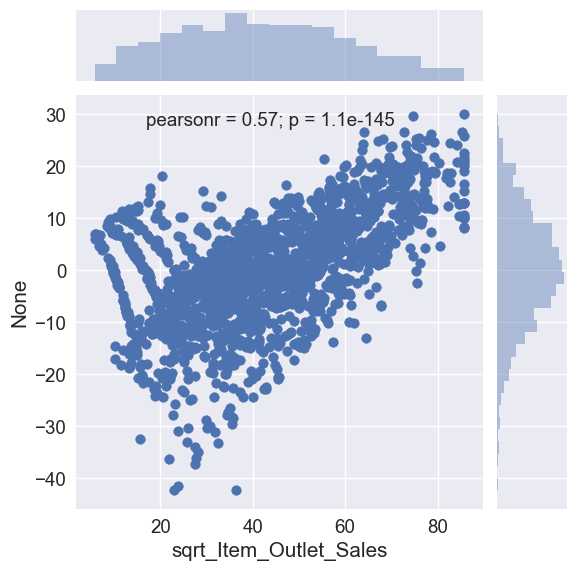

In [97]:
sns.jointplot(test_y,residuals )

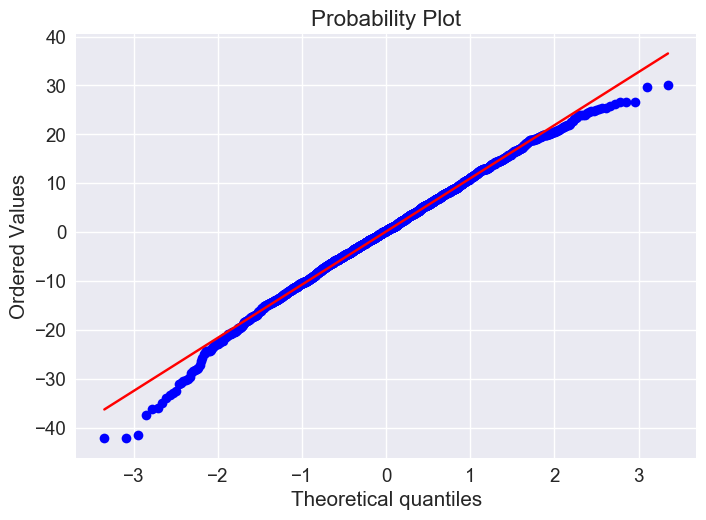

In [98]:
# To ensure residues are random i.e. normally distributed a Q-Q plot can be used
# Q-Q plot shows if the residuals are plotted along the line.
from scipy import stats
import pylab

stats.probplot( residuals, dist="norm", plot=pylab )
pylab.show()